# Building a Basic VE Workflow

The first step is to select "Cell" > "Run All" from the toolbar.  This will initialize all the widgets and allow you to interact with the unit operation options via the GUI controls.

In [1]:
from ipywidgets import *
from IPython.display import HTML, clear_output

from virteng.WidgetFunctions import WidgetCollection, OptimizationWidget
from virteng.OptimizationFunctions import Optimization
from virteng.Utilities import get_host_computer
from Models_classes import make_models_list
#================================================================
# See if we're running on HPC or on a laptop
hpc_run = get_host_computer()
#================================================================

It looks like you're running this notebook on a laptop.
Operations requiring HPC resources will be disabled.


---
### 1. Model 1  (Arrhenius equation)

Set the options for the Model 1 below.

In [5]:
#================================================================
# Create the collection of widgets for model1 options
model1_options = WidgetCollection()

options = {
    'value': 10,
    'max': 50,
    'min': 1,
    'description':'Frequancy factor',
    'tooltip':'The frequancy factor (1/c).  Must be in the range [1, 100]'
}
model1_options.freq_factor = OptimizationWidget('BoundedFloatText', options, controlvalue=False)

options = {
    'value': 800,
    'max': 10000,
    'min':300,
    'description':'Activation energy',
    'tooltip':'The activation energy of the reaction (J/mol).',
}
model1_options.act_energy = OptimizationWidget('BoundedFloatText', options, controlvalue=True)

options = {
    'value':200,
    'max':1000,
    'min':100,
    'description':'Temperature',
    'tooltip':'The temperature of the reaction (K).'
}
model1_options.temp = OptimizationWidget('BoundedFloatText', options, controlvalue=True)

#================================================================
# Display the widgets
model1_options.display_all_widgets()
#================================================================

---

### 2. Model 2 (concentration equation)

Set the options for the model 2.


In [6]:
#================================================================
# Create the collection of widgets
model2_options = WidgetCollection()

model2_options.time = widgets.BoundedFloatText(
    value = 1.0,
    max = 1000.0,
    min = 0.0,
    description = 'Time',
    tooltip = 'Time of the reaction (s).'
)

#================================================================
# Display the widgets
model2_options.display_all_widgets()

---

## Run Model

When finished setting options for all unit operations, press the button below to run the complete model.


In [7]:
#================================================================
run_button = widgets.Button(
    description = 'Run All.',
    tooltip = 'Execute the model start-to-finish with the properties specified above.',
    layout =  {'width': '200px', 'margin': '25px 0px 100px 170px'}, 
    button_style = 'success'
)
#================================================================

# run_button_output = widgets.Output()
display(run_button)

#================================================================
# Define a function to be executed each time the run button is pressed
def run_button_action(b):
    clear_output()
    display(run_button)
    verbose = True
    # Initialize models
    models_list = make_models_list([model1_options, model2_options], hpc_run)
    for model in models_list:
        model.run(verbose=verbose)
    
    print(f'k = {model.ve.model1_out['k']}')
    print(f"Final concentration is {model.ve.model2_out['C']}")
run_button.on_click(run_button_action)
#================================================================

Button(button_style='success', description='Run All.', layout=Layout(margin='25px 0px 100px 170px', width='200…

## Optimization example

In [5]:
obj_widget = widgets.Dropdown(
    options=[('Model2:            C',   ('model2_out', 'C')), 
             ('Model1:            k',   ('model1_out', 'k'))
            ],
    value=('model2_out', 'C'),
    description='Objective:',
    tooltip = 'Specifies the objective to use in optimization.'
)

display(obj_widget)


Dropdown(description='Objective:', options=(('Model2:            C', ('model2_out', 'C')), ('Model1:          …

Button(button_style='primary', description='Run Sweep.', layout=Layout(margin='25px 0px 100px 170px', width='2…

Objective "C" is in model2_out.
On each iteration running n=2 models

Optimizing Activation energy.
Optimizing Temperature.
Finished 100 forward runs.

Finished sweeps!


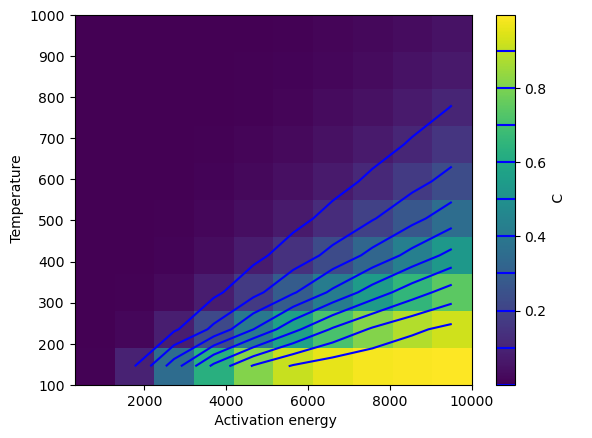

In [6]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import os
import numpy as np


# Parameter sweep
#================================================================
sweep_button = widgets.Button(
    description = 'Run Sweep.',
    tooltip = 'Execute the model start-to-finish with the properties specified above.',
    layout =  {'width': '200px', 'margin': '25px 0px 100px 170px'}, 
    button_style = 'primary'
)
#================================================================
# run_button_output = widgets.Output()
display(sweep_button)
#================================================================

# Define a function to be executed each time the run button is pressed
def sweep_button_action(b):
    clear_output()
    display(sweep_button)
    Opt = Optimization(case_folder='./', options_list=[model1_options, model2_options], obj_widjet=obj_widget, hpc_run=hpc_run)
    Opt.parameter_grid_sweep(nn=10, results_file='sweep_params.csv')



    param_sweep_fn = 'sweep_params.csv'
    if os.path.exists(param_sweep_fn):
        with open(param_sweep_fn, 'r') as f:
            firstline = f.readline().split(',')
        sweeps = np.loadtxt(param_sweep_fn, delimiter=',', skiprows=1)
        bounds = Opt.var_real_bounds
        extent = bounds[0][0], bounds[0][1], bounds[1][0], bounds[1][1]
        nn = int(np.sqrt(len(sweeps)))
        C = sweeps[:, 3].reshape(nn, nn)
        shw = plt.imshow(C.T, extent=extent, aspect='auto', origin='lower')
        _cs2 = plt.contour(C.T, levels=np.arange(0, 1, 0.1), extent=extent, origin='lower', colors='blue')
        bar = plt.colorbar(shw)
        bar.add_lines(_cs2)
        bar.set_label(firstline[-1])
        plt.xlabel(firstline[1])
        plt.ylabel(firstline[2])
    
sweep_button.on_click(sweep_button_action)
#===============================================================

Button(button_style='warning', description='Optimize.', layout=Layout(margin='25px 0px 25px 170px', width='200…

Objective "C" is in model2_out.
On each iteration running n=2 models

Optimizing Activation energy.
Optimizing Temperature.

Beginning Optimization
objective scaling: 1.0
Iter =   1: act_energy = 8.000000000e+02, temp = 2.000000000e+02, Objective = 2.068131354e-03
Iter =   2: act_energy = 8.000001445e+02, temp = 2.000000000e+02, Objective = 2.068132465e-03
Iter =   3: act_energy = 8.000000000e+02, temp = 2.000000134e+02, Objective = 2.068130941e-03
Iter =   4: act_energy = 1.000000000e+04, temp = 1.000000000e+02, Objective = 9.999402073e-01
Iter =   5: act_energy = 9.999999855e+03, temp = 1.000000000e+02, Objective = 9.999402072e-01
Iter =   6: act_energy = 1.000000000e+04, temp = 1.000000134e+02, Objective = 9.999402072e-01
 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -483.49937035268016
       x: [ 1.000e+00  0.000e+00]
     nit: 2
     jac: [-3.373e-01  3.129e+00]
    nfev: 6
    njev: 2


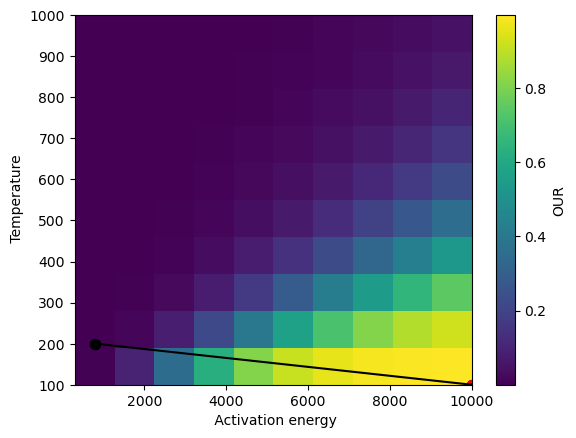

In [7]:
opt_button = widgets.Button(
    description = 'Optimize.',
    tooltip = 'Optimize for OUR using the conditions above as an initial guess.',
    layout =  {'width': '200px', 'margin': '25px 0px 25px 170px'}, 
    button_style = 'warning'
)
#================================================================

display(opt_button)

#================================================================
# Define a function to be executed each time the run button is pressed
def opt_button_action(b):
    clear_output()
    display(opt_button)
    
    params_filename = 'virteng_params_optimization.yaml'
    opt_results_file = 'optimization_results.csv'
    
    Opt = Optimization(case_folder='./', options_list=[model1_options, model2_options], obj_widjet=obj_widget, hpc_run=hpc_run)
    
    opt_result = Opt.scipy_minimize(Opt.objective_function, opt_results_file=opt_results_file)
    print(opt_result)


    param_sweep_fn = 'sweep_params.csv'
    if os.path.exists(param_sweep_fn):
        with open(param_sweep_fn, 'r') as f:
            firstline = f.readline().split(',')
        sweeps = np.loadtxt(param_sweep_fn, delimiter=',', skiprows=1)
        bounds = Opt.var_real_bounds
        extent = bounds[0][0], bounds[0][1], bounds[1][0], bounds[1][1]
        nn = int(np.sqrt(len(sweeps)))
        C = sweeps[:, 3].reshape(nn, nn)
        
    opt_results = np.loadtxt('optimization_results.csv', delimiter=',', skiprows=1)
    shw = plt.imshow(C.T, extent=extent, aspect='auto', origin='lower')
    bar = plt.colorbar(shw)
    bar.set_label('OUR')
    plt.xlabel(firstline[1])
    plt.ylabel(firstline[2])
    plt.scatter(opt_results[:, 1], opt_results[:, 2], s=50, c='k', marker='o')
    plt.plot(opt_results[:, 1], opt_results[:, 2], color='k')
    plt.scatter(opt_results[-1, 1], opt_results[-1, 2], s=50, c='r', marker='o')
    
opt_button.on_click(opt_button_action)

---

In [8]:
a = HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" \
value="Toggle code visibility (hidden by default)."></form>''')

display(a)